In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def add_year_month(df, time_col='time'):
    dt = pd.to_datetime(df[time_col])
    df['year'] = dt.dt.year
    df['month'] = dt.dt.month
    return df

In [3]:
summary_df = pd.read_csv("output/summary_df.csv")
summary_df

,start_month,lead_time,variable,p33,p50,p66
0,1,0,T2MAX,-0.297682,-0.138657,-0.007099
1,1,0,T2MIN,0.026461,0.089179,0.173905
2,1,1,T2MAX,-0.363715,-0.096699,0.252370
3,1,1,T2MIN,-0.474640,-0.165926,0.133425
4,1,2,T2MAX,-0.176754,-0.012726,0.179828
...,...,...,...,...,...,...
103,9,3,T2MIN,-0.244538,0.108843,0.427669
104,9,4,T2MAX,-0.428398,-0.165508,0.291104
105,9,4,T2MIN,-0.263229,0.107490,0.380833
106,9,5,T2MAX,-0.258055,-0.061331,0.263059


In [4]:
def plot_percentile_summary(summary_df, variables=["T2MAX", "T2MIN"]):
    """
    Make a 3×3 grid of subplots (Jan–Sep), plotting percentiles vs. lead time.
    
    Parameters
    ----------
    summary_df : pd.DataFrame
        Must contain ['start_month','lead_time','variable','p33','p50','p66']
    variables : list
        Which variables to plot separately.
    """
    # Map start_month numbers to short names
    month_map = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May",
                 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep"}
    
    for var in variables:
        df_var = summary_df[summary_df['variable'] == var]
        
        fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
        axes = axes.flatten()
        
        for i, sm in enumerate(sorted(df_var['start_month'].unique())):
            ax = axes[i]
            df_sm = df_var[df_var['start_month'] == sm]
            
            # Shift x-axis labels from 0–5 to 1–6
            lead_times = df_sm['lead_time'] + 1
            
            ax.plot(lead_times, df_sm['p33'], label="33rd", color="red", linestyle="--")
            ax.plot(lead_times, df_sm['p50'], label="50th", color="black", linestyle="-")
            ax.plot(lead_times, df_sm['p66'], label="66th", color="blue", linestyle="--")
            
            ax.set_title(f"{month_map.get(sm, sm)} start", fontsize=18)  # increased title fontsize
            ax.grid(True, alpha=0.3)
            ax.tick_params(axis='both', which='major', labelsize=14)  # increase tick labels font
        
        # Common labels
        fig.suptitle(f"Interannual Anomaly Correlations ({var})", fontsize=24)
        fig.supxlabel("Lead time (months)", fontsize=18)
        fig.supylabel("IAC (correlation)", fontsize=18)
        
        # Put legend only once (top center)
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(
            handles, labels, 
            loc="upper center", 
            ncol=3, 
            frameon=False, 
            bbox_to_anchor=(0.5, 1.02),
            fontsize=14
        )
        
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.show()


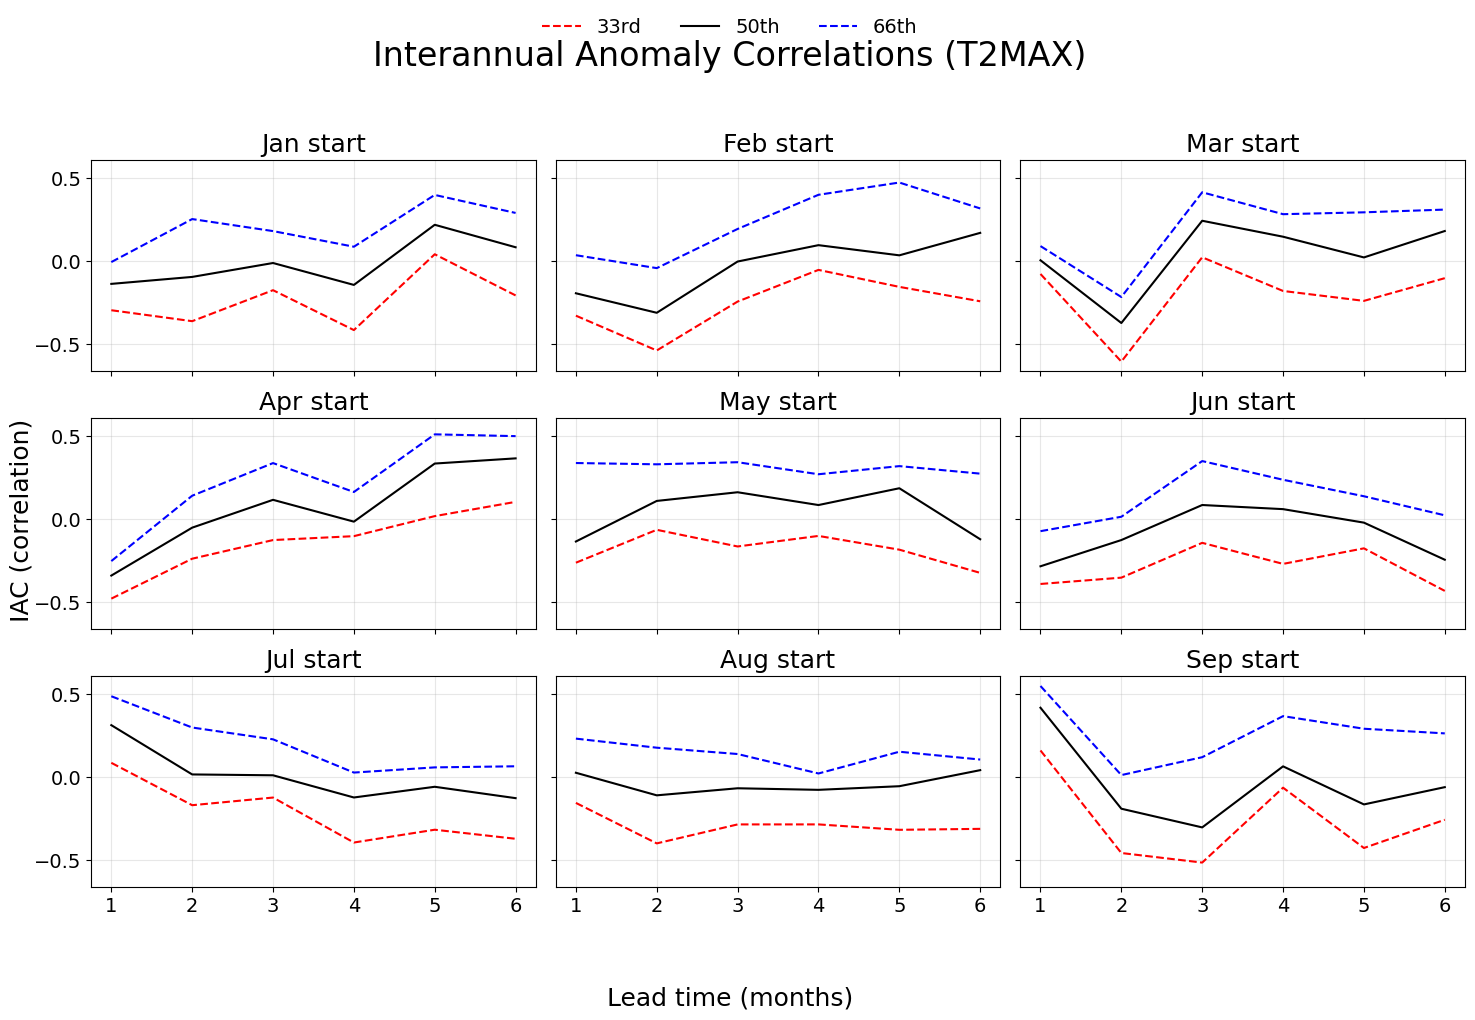

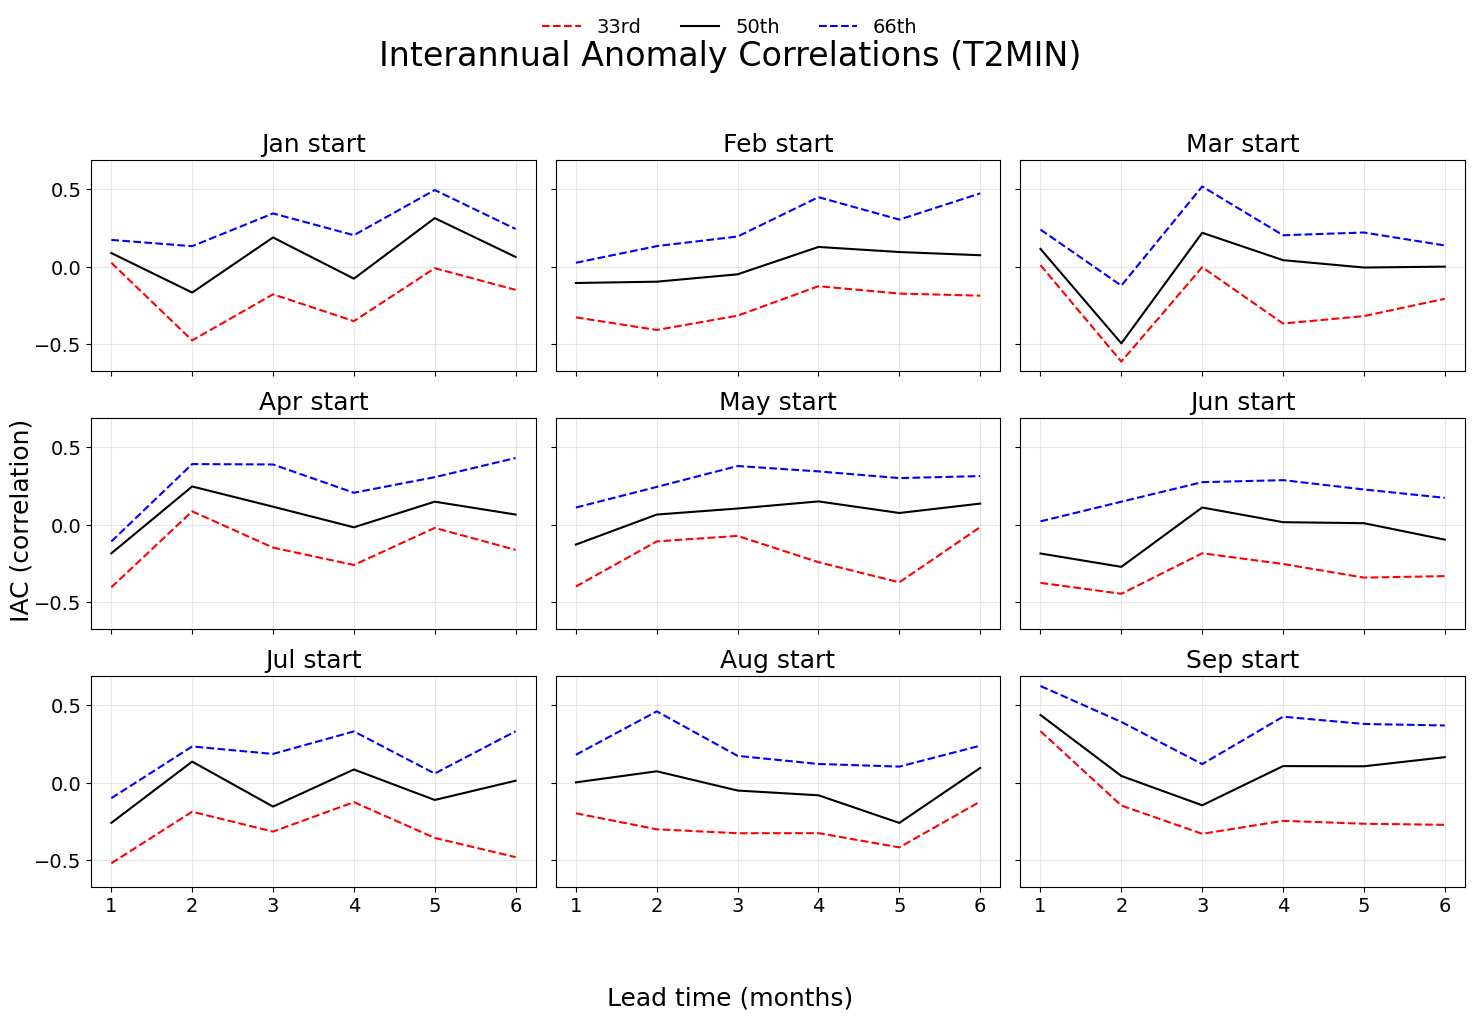

In [5]:
plot_percentile_summary(summary_df)

In [9]:
def plot_percentile_bars(summary_df, variables=["T2MAX", "T2MIN"]):
    """
    Plot the 66th percentile (p66) as grouped bar charts vs lead time.
    Colors indicate start month.
    
    Parameters
    ----------
    summary_df : pd.DataFrame
        Must contain ['start_month','lead_time','variable','p66']
    variables : list
        Which variables to plot separately.
    """
    month_map = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May",
                 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep"}
    
    cmap = plt.cm.get_cmap("tab20", 9)

    for var in variables:
        df_var = summary_df[summary_df['variable'] == var]
        
        months = sorted(df_var['start_month'].unique())
        n_months = len(months)
        
        fig, ax = plt.subplots(figsize=(16, 6))
        
        lead_times = sorted(df_var['lead_time'].unique() + 1)  # shift 0–5 → 1–6
        x = np.arange(len(lead_times))
        width = 0.8 / n_months
        
        for i, sm in enumerate(months):
            df_sm = df_var[df_var['start_month'] == sm].sort_values("lead_time")
            values = df_sm['p66'].values
            
            ax.bar(
                x + i*width - (n_months-1)*width/2,
                values,
                width=width,
                label=month_map.get(sm, sm),
                color=cmap(i)
            )
        
        ax.set_title(f"66th Percentile Anomaly Correlations ({var})", fontsize=22)
        ax.set_xlabel("Lead time (months)", fontsize=18)
        ax.set_ylabel("IAC (correlation)", fontsize=18)
        ax.set_xticks(x)
        ax.set_xticklabels(lead_times, fontsize=14)
        ax.tick_params(axis="y", labelsize=14)
        ax.grid(True, axis="y", alpha=0.3)
        
        # Fixed y-axis range
        ax.set_ylim(-0.3, 0.65)
        
        ax.legend(
            loc="center left", 
            bbox_to_anchor=(1, 0.5), 
            fontsize=18,
            title="Start month"
        )
        
        plt.tight_layout()
        plt.show()


C:\Users\Meteo\AppData\Local\Temp\ipykernel_41228\4142761973.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", 9)


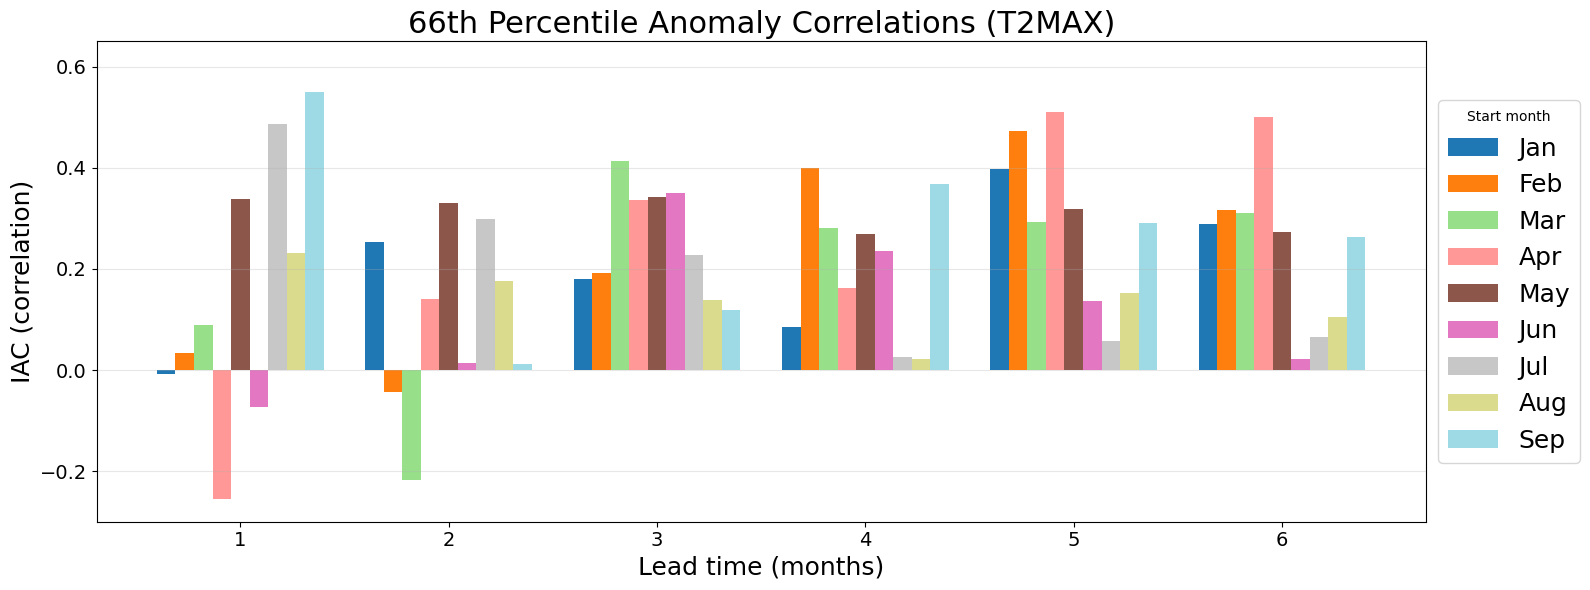

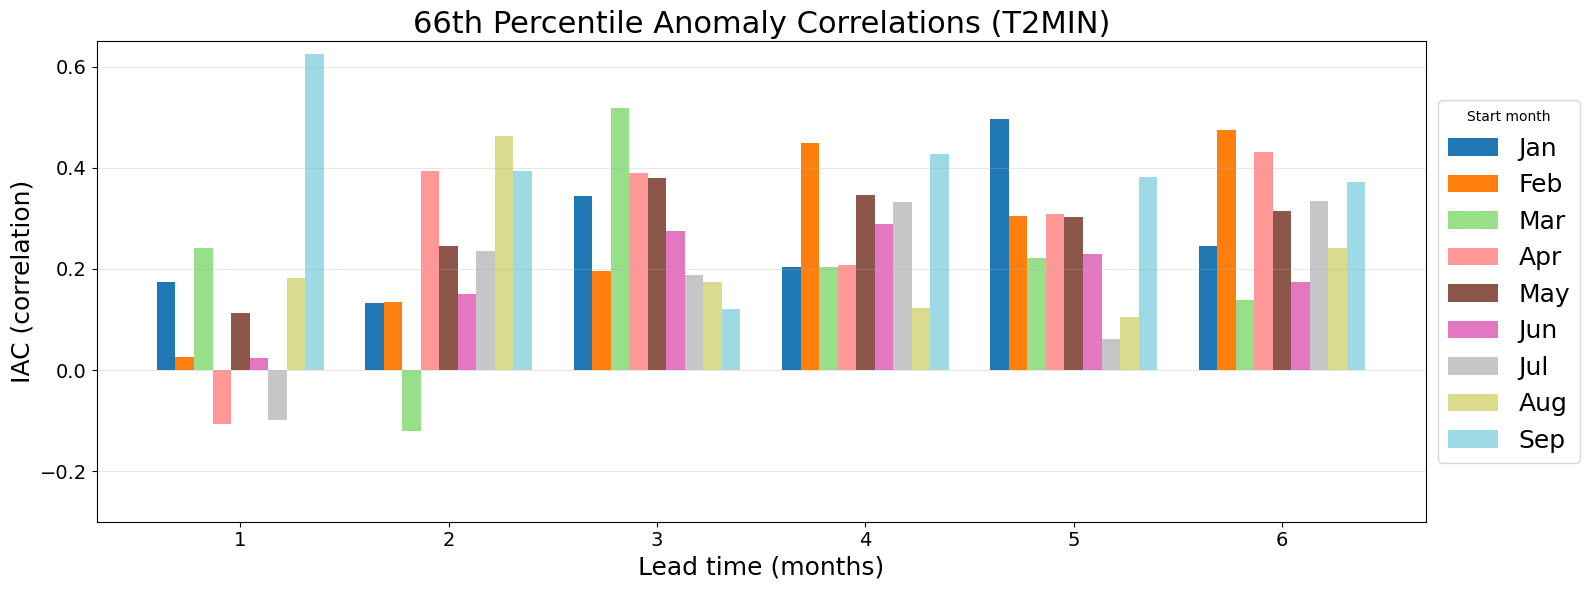

In [10]:
plot_percentile_bars(summary_df)